In [6]:
import pandas as pd
import re, os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

one_hot_df = pd.read_csv('Data/allData/oneHotDfAllCols.csv')

In [ ]:
# https://www.mdpi.com/2078-2489/14/3/161
# based on the above paper, we will compare the results of the following models:
# 1. Random Forest
# 2. Decision Tree
# 3. Logistic Regression
# 4. Gradient Boosting
# 5. Deep Learning
# 6. MLP

metrics = {'randomForest': {'accuracy':0, 'mae':0}, 'decisionTree': {'accuracy':0, 'mae':0}, 'logisticRegression': {'accuracy':0, 'mae':0}, 'gradientBoosting': {'accuracy':0, 'mae':0}, 'deepLearning': {'accuracy':0, 'mae':0}, 'mlp': {'accuracy':0, 'mae':0}}

In [ ]:
one_hot_df.drop(columns=['Unnamed: 0', 'STATE', 'RACE', 'OFFDETAIL', 'ADMTYPE', 'OFFGENERAL', 'ADMITYR', 'RELYR', 'RELTYPE', 'AGERLSE', 'TIMESRVD'], inplace=True)

# "independent" variables
feature_cols = list(one_hot_df.columns.values)
feature_cols.remove('SENTLGTH')

X = one_hot_df[feature_cols] # Features
y = one_hot_df['SENTLGTH'] # Target variable

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
feature_cols = list(one_hot_df.columns.values)
# remove 'STATE', 'RACE', 'OFFDETAIL', 'ADMTYPE', 'OFFGENERA'L, 'ADMITYR', 'SENTLGTH', 'RELYR', 'RELTYPE','AGERLSE','TIMESRVD' from the list
feature_cols.remove('STATE')
feature_cols.remove('RACE')
feature_cols.remove('OFFDETAIL')
feature_cols.remove('ADMTYPE')
feature_cols.remove('OFFGENERAL')
feature_cols.remove('ADMITYR')
feature_cols.remove('RELYR')
feature_cols.remove('RELTYPE')
feature_cols.remove('AGERLSE')
feature_cols.remove('TIMESRVD')
feature_cols.remove('SENTLGTH')
feature_cols.remove('Unnamed: 0')

X = one_hot_df[feature_cols] # Features
y = one_hot_df.SENTLGTH # Target variable

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

rf = RandomForestRegressor()
history = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
# Decision Tree Model 
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train, random_state=1)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

mae = np.mean(abs(y_pred - y_test))
print("Mean Absolute Error: " + mae)

metrics['decisionTree']['accuracy'] = accuracy
metrics['decisionTree']['mae'] = mae

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

mae = np.mean(abs(y_pred - y_test))
print("Mean Absolute Error: " + mae)

metrics['logisticRegression']['accuracy'] = accuracy
metrics['logisticRegression']['mae'] = mae

In [ ]:
# Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

mae = np.mean(abs(y_pred - y_test))
print("Mean Absolute Error: " + mae)

metrics['gradientBoosting']['accuracy'] = accuracy
metrics['gradientBoosting']['mae'] = mae

In [ ]:
# Deep Learning Model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=150, batch_size=10)

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

y_pred = model.predict(X_test)
y_pred = [round(x[0]) for x in y_pred]

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

mae = np.mean(abs(y_pred - y_test))
print("Mean Absolute Error: " + mae)

metrics['deepLearning']['accuracy'] = accuracy
metrics['deepLearning']['mae'] = mae

In [ ]:
# Deep Learning Model with MLPRegressor
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

y_pred = regr.predict(X_test[:2])
print("R^2 Score: ", regr.score(X_test, y_test))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

mae = np.mean(abs(y_pred - y_test))
print("Mean Absolute Error: " + mae)

metrics['mlp']['accuracy'] = accuracy
metrics['mlp']['mae'] = mae

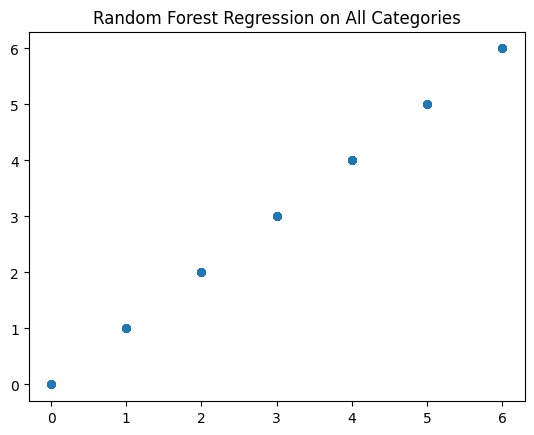

Mean Absolute Error: 0.0


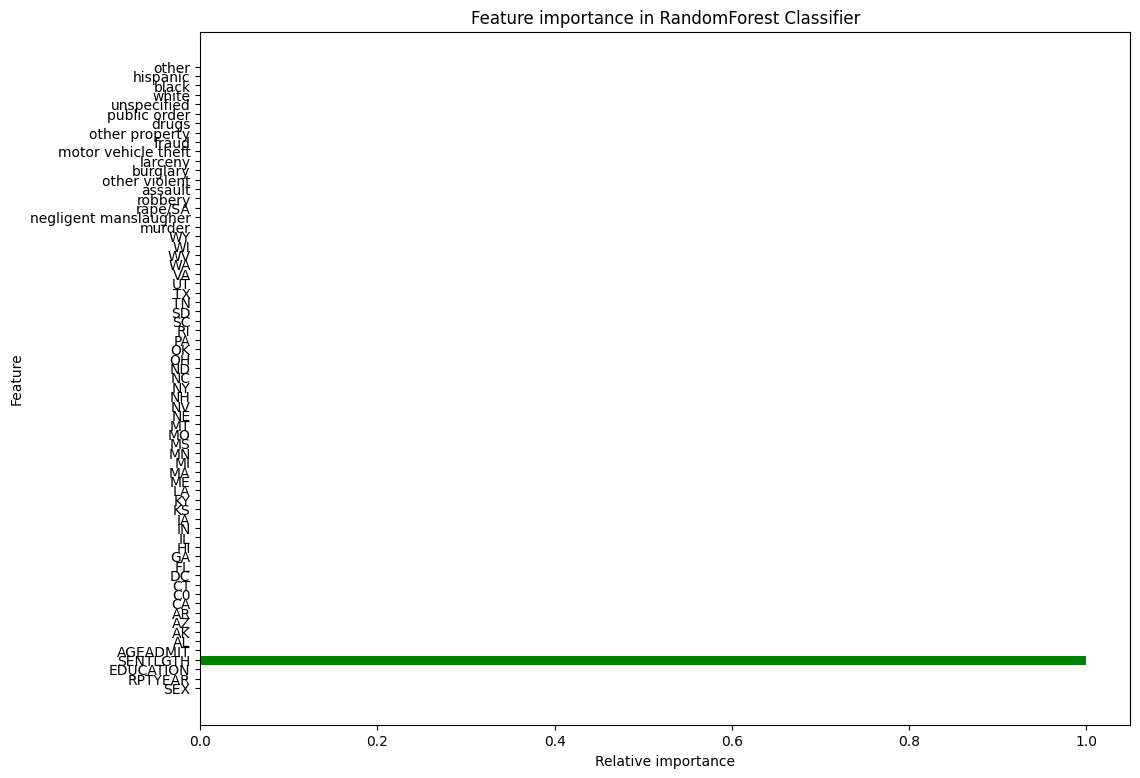

<Figure size 500x500 with 0 Axes>

In [7]:
# plot random forest regression output 

plt.scatter(y_pred, y_test, alpha=(0.002))
# add title
plt.title("Random Forest Regression on All Categories")
plt.show()

mae = np.mean(abs(y_pred - y_test))
print("Mean Absolute Error: " + str(mae))

# plot of feature importances
y = rf.feature_importances_
fig, ax = plt.subplots() 
width = 0.9
ind = np.arange(len(y)) 
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(feature_cols, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('Feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(12, 9, forward=True)
plt.savefig('feature_importance_all_cats.png', dpi=100, bbox_inches='tight')